## QSVT Phase Estimation : 
Partially complete as Block encoding performed on Pennylane and imported. Further improvements needed.

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *


C:\Users\Shaurya\anaconda3\envs\QiskitEnv\lib\site-packages\requests_ntlm\requests_ntlm.py:5: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography import x509


#### Transform : P(A)->Sign(x) : Block encoding using Pennylane and QSP Angles derived from QSPPack

In [3]:
# Define projectors.

def p_left(q, phi): #right projector
    qc = QuantumCircuit(q)
    n = q
    ctrl_range = list(range(0,n-1))
    
    for qubit in range(n-1): # Implement a simple multi 0-controlled
        qc.x(qubit)
    qc.mcx(ctrl_range , n-1) # 0-Controlled on all but the last qubits, acts on the last qubit
    for qubit in range(n-1):
        qc.x(qubit)
        
    #qc.barrier(0, 1, 2, 3)
    qc.rz(phi, n-1) # RZ(phi) on the last qubit
    #qc.barrier(0, 1, 2, 3)
    
    for qubit in range(n-1): # Reverse the effect of the first multi-control
        qc.x(qubit)
    qc.mcx(ctrl_range ,n-1) 
    for qubit in range(n-1):
        qc.x(qubit)
    
    p_left_gate = qc.to_gate() # Compiles all this into a gate
    p_left_gate.name = "P"
    return p_left_gate

def p_right(phi): # Left projector acts just on the signal and the ancillary qubit
    qc = QuantumCircuit(2)
    
    qc.cx(0, 1)
    qc.rz(phi, 1)
    qc.cx(0 ,1)
    
    p_right_gate = qc.to_gate()
    p_right_gate.name = "R(Φ)"
    return p_right_gate


In [13]:
# Derive U from Pennylane Methods

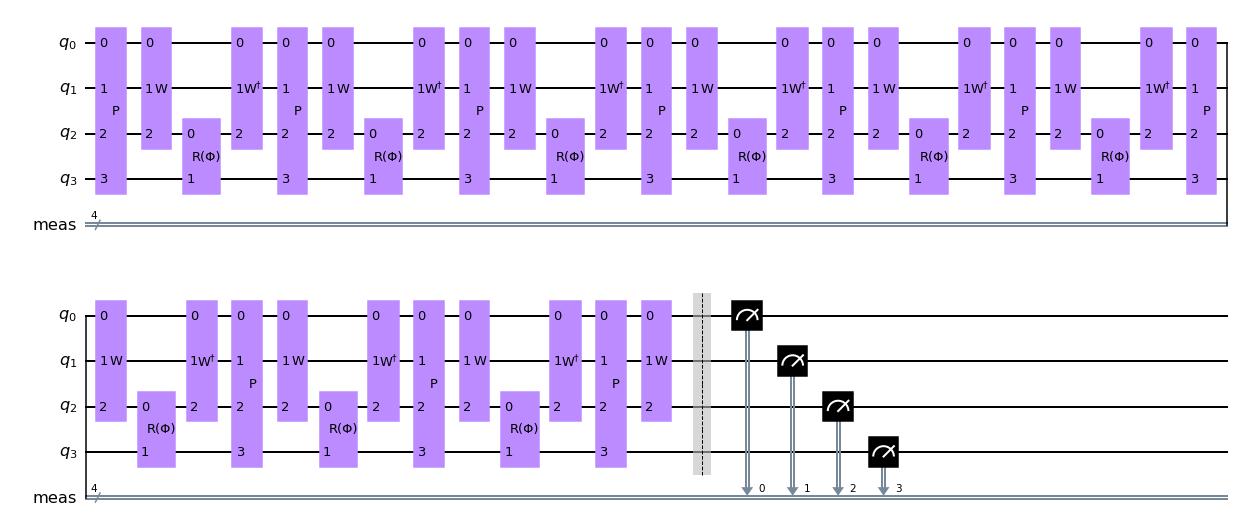

In [16]:
#we have 2 system qubits
system_qubits = 2 
#following the argument above we need 2 additional qubits
nqubits = system_qubits + 2
q = QuantumRegister(nqubits, 'q')
circuit = QuantumCircuit(q)

d = 19

u = U(nqubits-1)
u_dag = reverse_gate(u) #construct U_dagger

p_right_range = [nqubits-2, nqubits-1] # build the ranges of qubits for gates to act upon
u_range = list(range(0, nqubits-1))
p_left_range = list(range(0, nqubits))

circuit.append(p_left(nqubits, (1-d)*pi), p_left_range) # in general, starting from this line, 
circuit.append(u, u_range)                              # the circuit would iterate over the phases,
                                                        # but the phases for pure Cheby are just trivial pi/2
                                                        # so we chose to directly putting pi's in here for simplification
for i in range((d-1)//2):                               # we put pi instead of pi/2 because of how RZ is defined in Qiskit
    circuit.append(p_right(pi), p_right_range) 
    circuit.append(u_dag, u_range)
    circuit.append(p_left(nqubits, pi), p_left_range)
    circuit.append(u, u_range)

circuit.measure_all()
circuit.draw('mpl')
